<a href="https://colab.research.google.com/github/Zekrom0506/Centralized-repository-shipping_calculations/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy library

Consider the following code, which allows reading and displaying an image:

/tmp/ipython-input-3427246705.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


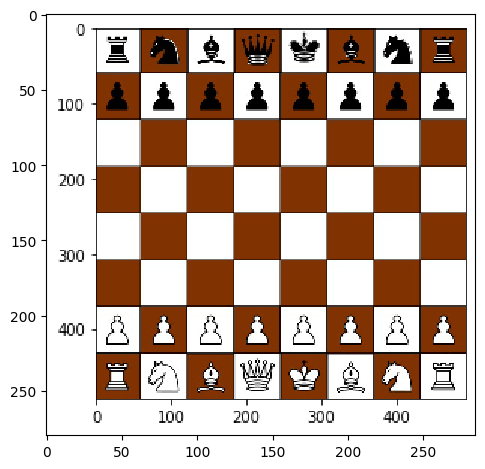

In [2]:
from skimage import io
img = io.imread('download.png')
io.imshow(img)

We can note that the image is stored as a $numpy$ array.

The array’s dimension is:

* 1 if the image is grayscale,
* 3 if the image is in RGB mode,
* and 4 if the image is in RGBA mode.

Depending on the image format, the values in the array can be either integers or floats. For the jpg format, the values are integers ranging from 0 to 255 (np.uint8).

**Q1. Display the type, dimension, and shape of the $img$ array.**

In [3]:
print("Type:", type(img))
print("Dimension:", img.ndim)
print("Shape:", img.shape)

Type: <class 'numpy.ndarray'>
Dimension: 3
Shape: (280, 285, 4)


**Q2. Display the type of the values and the number of elements in the $img$ array.**

In [4]:
print("Data type:", img.dtype)
print("Number of elements:", img.size)

Data type: uint8
Number of elements: 319200


In order to convert the image to grayscale, the following operation must be performed:

$Y = 0.2125 * R + 0.7154 * G + 0.0721 * B$

Where $Y$ represents the value of each pixel in the grayscale image.

### Elementary operations

---
**Q3.	Write the function $img2gray()$ that takes an RGB image as a parameter and returns a $float64$ array representing the image in grayscale.**

In [5]:
def img2gray(img):
    """Convert RGB image to grayscale"""
    gray = 0.2125 * img[:,:,0] + 0.7154 * img[:,:,1] + 0.0721 * img[:,:,2]
    return gray.astype('float64')

**Q4.	Display the image using the command:**

*io.imshow(imgGray, cmap="gray")*


/tmp/ipython-input-3090933011.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(imgGray, cmap="gray")
/usr/local/lib/python3.12/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


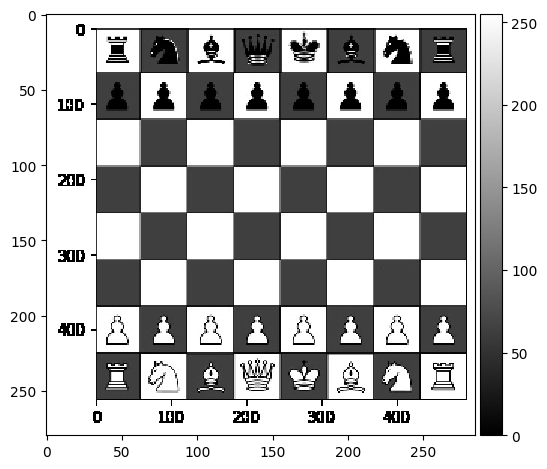

In [6]:
imgGray = img2gray(img)
io.imshow(imgGray, cmap="gray")

**Q5.	Write the function $addBorder()$ that takes an image and an integer b as parameters, where b represents the width of the black border to be added to each side. The function should return the resulting image.**

In [12]:
def addBorder(img, b):
    if len(img.shape) == 3:
        bordered = np.zeros((img.shape[0] + 2*b, img.shape[1] + 2*b, img.shape[2]))
    else:  # Grayscale image
        bordered = np.zeros((img.shape[0] + 2*b, img.shape[1] + 2*b))

    bordered[b:-b, b:-b] = img
    return bordered

**Q6.	Write the function flipImageV() that takes an image as a parameter and returns the mirror effect of the image along the vertical axis.**

In [11]:
def flipImageV(img):
    return img[:, ::-1]

**Q7.	Write the function flipImageH() that takes an image as a parameter and returns the mirror effect of the image along the horizontal axis.**

In [9]:
def flipImageH(img):
    """Mirror image along horizontal axis (top-bottom flip)"""
    return img[::-1, :]

### Date

The objective is to be able to add a date in the format DD/MM/YYYY on the images. To do this, each character will be represented by a 2D array of 9 rows and 7 columns.

As an example, the digit 8 is represented as follows:
$$
\begin{bmatrix}
\begin{bmatrix}255 & 255 & 255 & 255 & 255 & 255 & 255\end{bmatrix}\\
\begin{bmatrix}255 & 255 &~~~~0&~~~~0&~~~~0& 255 & 255\end{bmatrix}\\
\begin{bmatrix}255 &~~~~0& 255 & 255 & 255 &~~~~0& 255\end{bmatrix}\\
\begin{bmatrix}255 &~~~~0& 255 & 255 & 255 &~~~~0& 255\end{bmatrix}\\
\begin{bmatrix}255 & 255 &~~~~0&~~~~0&~~~~0& 255 & 255\end{bmatrix}\\
\begin{bmatrix}255 &~~~~0& 255 & 255 & 255 &~~~~0& 255\end{bmatrix}\\
\begin{bmatrix}255 &~~~~0& 255 & 255 & 255 &~~~~0& 255\end{bmatrix}\\
\begin{bmatrix}255 & 255 &~~~~0&~~~~0&~~~~0& 255 & 255\end{bmatrix}\\
\begin{bmatrix}255 & 255 & 255 & 255 & 255 & 255 & 255\end{bmatrix}\\
\end{bmatrix}
$$

The result in image format:

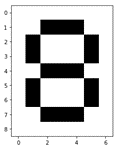

The list of digits and the slash:

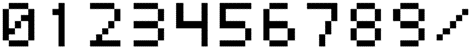

**Q8.	Write the function $date2tab()$ that takes a date in the format *DD/MM/YYYY* as a parameter and returns it as a 2D array. Display the date in the form of an image.**

**Expected result:**

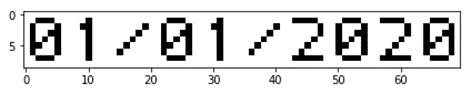

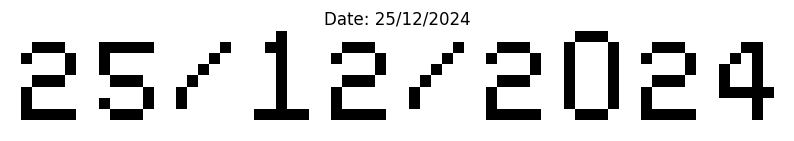

✅ Date image created successfully!
Image shape: (9, 70)


In [13]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

def date2tab(date_str):

    # Define digit patterns (9 rows x 7 columns)
    digits = {
        '0': np.array([
            [255, 255, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '1': np.array([
            [255, 255, 255, 0, 255, 255, 255],
            [255, 255, 0, 0, 255, 255, 255],
            [255, 255, 255, 0, 255, 255, 255],
            [255, 255, 255, 0, 255, 255, 255],
            [255, 255, 255, 0, 255, 255, 255],
            [255, 255, 255, 0, 255, 255, 255],
            [255, 255, 255, 0, 255, 255, 255],
            [255, 0, 0, 0, 0, 0, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '2': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 255, 255],
            [255, 0, 255, 255, 255, 255, 255],
            [255, 0, 0, 0, 0, 0, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '3': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 255, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '4': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 255, 255, 0, 0, 255, 255],
            [255, 255, 0, 255, 0, 255, 255],
            [255, 0, 255, 255, 0, 255, 255],
            [255, 0, 255, 255, 0, 255, 255],
            [255, 0, 0, 0, 0, 0, 255],
            [255, 255, 255, 255, 0, 255, 255],
            [255, 255, 255, 255, 0, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '5': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 0, 0, 0, 0, 0, 255],
            [255, 0, 255, 255, 255, 255, 255],
            [255, 0, 255, 255, 255, 255, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 255, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '6': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 255, 255],
            [255, 0, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '7': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 0, 0, 0, 0, 0, 255],
            [255, 255, 255, 255, 255, 0, 255],
            [255, 255, 255, 255, 0, 255, 255],
            [255, 255, 255, 0, 255, 255, 255],
            [255, 255, 0, 255, 255, 255, 255],
            [255, 255, 0, 255, 255, 255, 255],
            [255, 255, 0, 255, 255, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '8': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '9': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 0, 255],
            [255, 255, 255, 255, 255, 0, 255],
            [255, 0, 255, 255, 255, 0, 255],
            [255, 255, 0, 0, 0, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8),
        '/': np.array([
            [255, 255, 255, 255, 255, 255, 255],
            [255, 255, 255, 255, 255, 0, 255],
            [255, 255, 255, 255, 0, 255, 255],
            [255, 255, 255, 0, 255, 255, 255],
            [255, 255, 0, 255, 255, 255, 255],
            [255, 0, 255, 255, 255, 255, 255],
            [255, 0, 255, 255, 255, 255, 255],
            [255, 255, 255, 255, 255, 255, 255],
            [255, 255, 255, 255, 255, 255, 255]
        ], dtype=np.uint8)
    }

    # Convert date string to list of arrays
    result = []
    for char in date_str:
        if char in digits:
            result.append(digits[char])

    # Concatenate horizontally
    date_array = np.hstack(result)

    return date_array

# Test the function
date_img = date2tab("25/12/2024")

# Display using matplotlib (more reliable)
plt.figure(figsize=(10, 2))
plt.imshow(date_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Date: 25/12/2024")
plt.show()

print("✅ Date image created successfully!")
print(f"Image shape: {date_img.shape}")

---
# Pandas library

You can use the following datasets for these exercises: [Iris Dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv)

The dataset contains the following columns:  
- `sepal_length`: Length of the sepal (in cm)  
- `sepal_width`: Width of the sepal (in cm)  
- `petal_length`: Length of the petal (in cm)  
- `petal_width`: Width of the petal (in cm)  
- `species`: Species of the iris flower (setosa, versicolor, virginica)

**Exercise 1: Basic DataFrame Exploration**
1. Load the Iris Dataset using `read_csv()` from this URL:  
   `https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv`.
2. Display the first 5 rows using `head()`.
3. Display the last 3 rows using `tail()`.
4. Print the column names using `.columns`.
5. Print the index of the DataFrame using `.index`.

In [15]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. First 5 rows
print("First 5 rows:")
print(df.head())

# 3. Last 3 rows
print("\nLast 3 rows:")
print(df.tail(3))

# 4. Column names
print("\nColumn names:")
print(df.columns)

# 5. Index
print("\nIndex:")
print(df.index)

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Last 3 rows:
     sepal_length  sepal_width  petal_length  petal_width    species
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

Column names:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Index:
RangeIndex(start=0, stop=150, step=1)


**Exercise 2: Data Inspection**
1. Load the Iris Dataset.
2. Use `describe()` to get summary statistics for numerical columns.
3. Use `to_numpy()` to convert the DataFrame into a NumPy array.
4. Print the shape of the NumPy array.

In [16]:
# 1. Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. Summary statistics
print("Summary statistics:")
print(df.describe())

# 3. Convert to NumPy array
arr = df.to_numpy()
print("\nNumPy array:")
print(arr)

# 4. Shape
print("\nShape of array:", arr.shape)

Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

NumPy array:
[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 

**Exercise 3: Sorting Data**
1. Sort the DataFrame by the `sepal_length` column using `sort_values()`.
2. Display the first 5 rows after sorting by `sepal_length`.
3. Sort the DataFrame by the index in descending order using `sort_index(ascending=False)`.
4. Display the first 5 rows after sorting by the index.

In [17]:
# 1. Sort by sepal_length
df_sorted = df.sort_values('sepal_length')

# 2. Display first 5 rows
print("First 5 rows after sorting by sepal_length:")
print(df_sorted.head())

# 3. Sort by index descending
df_sorted_idx = df.sort_index(ascending=False)

# 4. Display first 5 rows
print("\nFirst 5 rows after sorting by index (descending):")
print(df_sorted_idx.head())

First 5 rows after sorting by sepal_length:
    sepal_length  sepal_width  petal_length  petal_width species
13           4.3          3.0           1.1          0.1  setosa
8            4.4          2.9           1.4          0.2  setosa
42           4.4          3.2           1.3          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
41           4.5          2.3           1.3          0.3  setosa

First 5 rows after sorting by index (descending):
     sepal_length  sepal_width  petal_length  petal_width    species
149           5.9          3.0           5.1          1.8  virginica
148           6.2          3.4           5.4          2.3  virginica
147           6.5          3.0           5.2          2.0  virginica
146           6.3          2.5           5.0          1.9  virginica
145           6.7          3.0           5.2          2.3  virginica


**Exercise 4: Handling Missing Data**
1. Load the Iris Dataset.
2. Introduce some missing values in the `sepal_width` column (e.g., set the first 5 values to `NaN`).
3. Use `fillna()` to replace missing values with the mean of the column.
4. Use `ffill()` to forward-fill missing values.
5. Use `interpolate()` to interpolate missing values.

In [18]:
import numpy as np

# 1. Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. Introduce missing values
df.loc[0:4, 'sepal_width'] = np.nan
print("After introducing NaN:")
print(df.head())

# 3. Fill with mean
df_fillna = df.copy()
df_fillna['sepal_width'].fillna(df_fillna['sepal_width'].mean(), inplace=True)
print("\nAfter fillna with mean:")
print(df_fillna.head())

# 4. Forward fill
df_ffill = df.copy()
df_ffill['sepal_width'].ffill(inplace=True)
print("\nAfter forward fill:")
print(df_ffill.head())

# 5. Interpolate
df_interp = df.copy()
df_interp['sepal_width'].interpolate(inplace=True)
print("\nAfter interpolation:")
print(df_interp.head())

After introducing NaN:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          NaN           1.4          0.2  setosa
1           4.9          NaN           1.4          0.2  setosa
2           4.7          NaN           1.3          0.2  setosa
3           4.6          NaN           1.5          0.2  setosa
4           5.0          NaN           1.4          0.2  setosa

After fillna with mean:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1     3.049655           1.4          0.2  setosa
1           4.9     3.049655           1.4          0.2  setosa
2           4.7     3.049655           1.3          0.2  setosa
3           4.6     3.049655           1.5          0.2  setosa
4           5.0     3.049655           1.4          0.2  setosa

After forward fill:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          NaN           1.4          0.2  setosa
1           4.9          NaN       

/tmp/ipython-input-901715715.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['sepal_width'].fillna(df_fillna['sepal_width'].mean(), inplace=True)
/tmp/ipython-input-901715715.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

**Exercise 5: Data Selection**
1. Load the Iris Dataset.
2. Use `loc[]` to select rows where the `species` is "setosa".
3. Use `iloc[]` to select the first 10 rows and the first 3 columns.
4. Print the selected data.

In [22]:
# 1. Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. Select setosa species
setosa = df.loc[df['species'] == 'setosa']
print("Setosa species:")
print(setosa)

# 3. Select first 10 rows, first 3 columns
subset = df.iloc[0:10, 0:3]
print("\nFirst 10 rows, first 3 columns:")
print(subset)

Setosa species:
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14       

**Exercise 6: Reading Different File Formats**
1. Load the Iris Dataset as a CSV file using `read_csv()`.
2. Save the DataFrame as an Excel file using `to_excel()` and load it back using `read_excel()`.
3. Save the DataFrame as a JSON file using `to_json()` and load it back using `read_json()`.
4. Compare the structure of the three DataFrames.

In [23]:
# 1. Load CSV
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. Save and load Excel
df.to_excel('iris.xlsx', index=False)
df_excel = pd.read_excel('iris.xlsx')
print("Excel DataFrame:")
print(df_excel.head())

# 3. Save and load JSON
df.to_json('iris.json')
df_json = pd.read_json('iris.json')
print("\nJSON DataFrame:")
print(df_json.head())

# 4. Compare structures
print("\nCSV shape:", df.shape)
print("Excel shape:", df_excel.shape)
print("JSON shape:", df_json.shape)

Excel DataFrame:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

JSON DataFrame:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

CSV shape: (150, 5)
Excel shape: (150, 5)
JSON shape: (150, 5)


**Exercise 7: Data Filtering**
1. Load the Iris Dataset.
2. Use `loc[]` to filter rows where the `petal_length` is greater than 5.
3. Use `iloc[]` to select every alternate row in the DataFrame.
4. Display the filtered data.

In [24]:
# 1. Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. Filter petal_length > 5
filtered = df.loc[df['petal_length'] > 5]
print("Rows where petal_length > 5:")
print(filtered)

# 3. Select every alternate row
alternate = df.iloc[::2]
print("\nEvery alternate row:")
print(alternate.head(10))

Rows where petal_length > 5:
     sepal_length  sepal_width  petal_length  petal_width     species
83            6.0          2.7           5.1          1.6  versicolor
100           6.3          3.3           6.0          2.5   virginica
101           5.8          2.7           5.1          1.9   virginica
102           7.1          3.0           5.9          2.1   virginica
103           6.3          2.9           5.6          1.8   virginica
104           6.5          3.0           5.8          2.2   virginica
105           7.6          3.0           6.6          2.1   virginica
107           7.3          2.9           6.3          1.8   virginica
108           6.7          2.5           5.8          1.8   virginica
109           7.2          3.6           6.1          2.5   virginica
110           6.5          3.2           5.1          2.0   virginica
111           6.4          2.7           5.3          1.9   virginica
112           6.8          3.0           5.5          2.1   v

**Exercise 8: Data Aggregation**
1. Load the Iris Dataset.
2. Use `describe()` to get summary statistics for all columns.
3. Group the data by the `species` column and calculate the mean of the `petal_length` column.
4. Display the grouped data.

In [25]:
# 1. Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. Summary statistics
print("Summary statistics:")
print(df.describe())

# 3. Group by species and calculate mean petal_length
grouped = df.groupby('species')['petal_length'].mean()
print("\nMean petal_length by species:")
print(grouped)

Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Mean petal_length by species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


**Exercise 9: Data Cleaning**
1. Load the Iris Dataset.
2. Introduce some missing values in the `petal_width` column (e.g., set the last 5 values to `NaN`).
3. Use `fillna()` to replace missing values with the median of the column.
4. Use `interpolate()` to fill missing values using linear interpolation.
5. Display the cleaned DataFrame.

In [26]:
# 1. Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. Introduce missing values
df.loc[df.index[-5:], 'petal_width'] = np.nan
print("After introducing NaN:")
print(df.tail())

# 3. Fill with median
df_median = df.copy()
df_median['petal_width'].fillna(df_median['petal_width'].median(), inplace=True)
print("\nAfter fillna with median:")
print(df_median.tail())

# 4. Interpolate
df_interp = df.copy()
df_interp['petal_width'].interpolate(inplace=True)
print("\nAfter interpolation:")
print(df_interp.tail())

After introducing NaN:
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          NaN  virginica
146           6.3          2.5           5.0          NaN  virginica
147           6.5          3.0           5.2          NaN  virginica
148           6.2          3.4           5.4          NaN  virginica
149           5.9          3.0           5.1          NaN  virginica

After fillna with median:
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          1.3  virginica
146           6.3          2.5           5.0          1.3  virginica
147           6.5          3.0           5.2          1.3  virginica
148           6.2          3.4           5.4          1.3  virginica
149           5.9          3.0           5.1          1.3  virginica

After interpolation:
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0 

/tmp/ipython-input-3064571003.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['petal_width'].fillna(df_median['petal_width'].median(), inplace=True)
/tmp/ipython-input-3064571003.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

Exercise 10: Advanced Data Selection**
1. Load the Iris Dataset.
2. Use `loc[]` to select rows where the `species` is "virginica" and the `sepal_length` is greater than 6.
3. Use `iloc[]` to select rows 50 to 100 and columns 2 to 4.
4. Display the selected data.

In [27]:
# 1. Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 2. Select virginica with sepal_length > 6
selection1 = df.loc[(df['species'] == 'virginica') & (df['sepal_length'] > 6)]
print("Virginica with sepal_length > 6:")
print(selection1)

# 3. Select rows 50-100, columns 2-4
selection2 = df.iloc[50:100, 2:4]
print("\nRows 50-100, columns 2-4:")
print(selection2)

Virginica with sepal_length > 6:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
102           7.1          3.0           5.9          2.1  virginica
103           6.3          2.9           5.6          1.8  virginica
104           6.5          3.0           5.8          2.2  virginica
105           7.6          3.0           6.6          2.1  virginica
107           7.3          2.9           6.3          1.8  virginica
108           6.7          2.5           5.8          1.8  virginica
109           7.2          3.6           6.1          2.5  virginica
110           6.5          3.2           5.1          2.0  virginica
111           6.4          2.7           5.3          1.9  virginica
112           6.8          3.0           5.5          2.1  virginica
115           6.4          3.2           5.3          2.3  virginica
116           6.5          3.0           5.5          1.8  virginica
1